In [22]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import requests
import os
import glob
import numpy as np 

import xarray
import cartopy
from scipy.interpolate import griddata


In [2]:
geo_df = gpd.read_file("https://gist.githubusercontent.com/walkerke/76cb8cc5f949432f9555/raw/363c297ce82a4dcb9bdf003d82aa4f64bc695cf1/mx.geojson")
geo_df.head()

,id,name,state,mus09,pri10,sec10,ter10,gdp08,other10,geometry
0,1,Aguascalientes,Aguascalientes,17.1,6.34,28.74,64.28,84.70,0.64,"MULTIPOLYGON (((-102.21140 22.35450, -102.1908..."
1,2,Baja California,Baja California,15.4,5.44,31.64,61.68,83.07,1.24,"MULTIPOLYGON (((-114.09429 28.02418, -114.0774..."
2,3,Baja California Sur,Baja California Sur,3.0,9.18,17.48,72.37,94.64,0.97,"MULTIPOLYGON (((-109.79843 24.15516, -109.8028..."
3,4,Campeche,Campeche,7.0,19.24,21.20,57.11,395.55,2.45,"MULTIPOLYGON (((-91.52440 18.76659, -91.52457 ..."
4,5,Chiapas,Chiapas,13.9,42.76,13.51,42.90,34.44,0.83,"MULTIPOLYGON (((-93.97061 16.00979, -93.96390 ..."


In [3]:
os.getcwd()[:-len('NotebooksLluvia')]

'C:\\Users\\sebas\\OneDrive\\Escritorio\\ARCGIS\\'

In [4]:
data_path = os.getcwd()[:-len('NotebooksLluvia')] + '/Data/Lluvia/2013/'
db_data_path = data_path 
os.listdir()
print(os.listdir(db_data_path))

['201301010000Lluv.csv', '201302010000Lluv.csv', '201303010000Lluv.csv', '201304010000Lluv.csv', '201305010000Lluv.csv', '201306010000Lluv.csv', '201307010000Lluv.csv', '201308010000Lluv.csv', '201309010000Lluv.csv', '201310010000Lluv.csv', '201311010000Lluv.csv', '201312010000Lluv.csv']


In [5]:
all_files = glob.glob(db_data_path+'*.csv')
all_files

['C:\\Users\\sebas\\OneDrive\\Escritorio\\ARCGIS\\/Data/Lluvia/2013\\201301010000Lluv.csv',
 'C:\\Users\\sebas\\OneDrive\\Escritorio\\ARCGIS\\/Data/Lluvia/2013\\201302010000Lluv.csv',
 'C:\\Users\\sebas\\OneDrive\\Escritorio\\ARCGIS\\/Data/Lluvia/2013\\201303010000Lluv.csv',
 'C:\\Users\\sebas\\OneDrive\\Escritorio\\ARCGIS\\/Data/Lluvia/2013\\201304010000Lluv.csv',
 'C:\\Users\\sebas\\OneDrive\\Escritorio\\ARCGIS\\/Data/Lluvia/2013\\201305010000Lluv.csv',
 'C:\\Users\\sebas\\OneDrive\\Escritorio\\ARCGIS\\/Data/Lluvia/2013\\201306010000Lluv.csv',
 'C:\\Users\\sebas\\OneDrive\\Escritorio\\ARCGIS\\/Data/Lluvia/2013\\201307010000Lluv.csv',
 'C:\\Users\\sebas\\OneDrive\\Escritorio\\ARCGIS\\/Data/Lluvia/2013\\201308010000Lluv.csv',
 'C:\\Users\\sebas\\OneDrive\\Escritorio\\ARCGIS\\/Data/Lluvia/2013\\201309010000Lluv.csv',
 'C:\\Users\\sebas\\OneDrive\\Escritorio\\ARCGIS\\/Data/Lluvia/2013\\201310010000Lluv.csv',
 'C:\\Users\\sebas\\OneDrive\\Escritorio\\ARCGIS\\/Data/Lluvia/2013\\20131101000

In [6]:
len(all_files)

12

In [7]:
li = []
Lluv = ['LON', 'LAT', 'ESTADO', 'CVE_SIH', 'NOMBRE_ESTACION' ]
Mes = ['ENE','FEB','MAR','ABR','MAY','JUN','JUL','AGO','SEP','OCT','NOV','DIC']

In [8]:

for i in range(len(all_files)):
    df = pd.read_csv(all_files[i], encoding='latin-1')
    df.columns = ['LON', 'LAT', 'ESTADO', 'CVE_SIH', 'NOMBRE_ESTACION','MES']
    df = df.rename(columns={'MES':Mes[i]})
    li.append(df)
    


In [9]:
d1=li[0]
d2=li[1]
d3=li[2]
d4=li[3]
d5=li[4]
d6=li[5]
d7=li[6]
d8=li[7]
d9=li[8]
d10=li[9]
d11=li[10]
d12=li[11]

In [10]:
from functools import reduce
dfl=[d1,d2,d3,d4,d5,d6,d7,d8,d9,d10,d11,d12]
df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['LON', 'LAT', 'ESTADO', 'CVE_SIH', 'NOMBRE_ESTACION'],
                                            how='outer'), dfl)

df_merged

,LON,LAT,ESTADO,CVE_SIH,NOMBRE_ESTACION,ENE,FEB,MAR,ABR,MAY,JUN,JUL,AGO,SEP,OCT,NOV,DIC
0,-102.31,21.90,AGS,AGSAG,AGUASCALIENTES,58.5,0.0,0.2,0.0,14.8,91.8,212.5,59.1,135.4,25.7,20.6,77.5
1,-102.47,22.19,AGS,ANVAG,CINCUENTA ANIVERSARIO,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,45.0,44.7,92.2
2,-102.18,21.74,AGS,BRTAG,SAN BARTOLO,17.0,0.0,0.0,0.0,63.9,135.4,218.1,NaN,NaN,NaN,NaN,NaN
3,-102.67,22.00,AGS,CDRAG,LA CODORNIZ,45.0,0.0,0.0,0.0,6.0,56.7,249.0,103.5,115.3,36.7,31.7,104.9
4,-102.19,21.83,AGS,CLVAG,CALVILLITO,60.5,0.0,1.8,0.0,88.0,89.1,267.2,46.7,215.3,5.8,32.7,69.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1207,-99.78,19.75,MEX,ATLMX,ATLACOMULCO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.0,30.4
1208,-99.68,19.12,MEX,NEVMX,"NEVADO DE TOLUCA, MEX. AUTOMATICA",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63.3,19.6
1209,-101.72,20.13,MICH,ANGMC,"ANGAMACUTIRO, MICH. AUTOMATICA",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0
1210,-96.50,15.67,OAX,PUAOX,"PUERTO ANGEL, OAX. AUTOMATICA",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,8.6


In [11]:
geo_df1 = gpd.GeoDataFrame(df_merged, geometry=gpd.points_from_xy(df_merged.LON, df_merged.LAT), crs="EPSG:4326")
geo_df1.head()

,LON,LAT,ESTADO,CVE_SIH,NOMBRE_ESTACION,ENE,FEB,MAR,ABR,MAY,JUN,JUL,AGO,SEP,OCT,NOV,DIC,geometry
0,-102.31,21.90,AGS,AGSAG,AGUASCALIENTES,58.5,0.0,0.2,0.0,14.8,91.8,212.5,59.1,135.4,25.7,20.6,77.5,POINT (-102.31000 21.90000)
1,-102.47,22.19,AGS,ANVAG,CINCUENTA ANIVERSARIO,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,45.0,44.7,92.2,POINT (-102.47000 22.19000)
2,-102.18,21.74,AGS,BRTAG,SAN BARTOLO,17.0,0.0,0.0,0.0,63.9,135.4,218.1,NaN,NaN,NaN,NaN,NaN,POINT (-102.18000 21.74000)
3,-102.67,22.00,AGS,CDRAG,LA CODORNIZ,45.0,0.0,0.0,0.0,6.0,56.7,249.0,103.5,115.3,36.7,31.7,104.9,POINT (-102.67000 22.00000)
4,-102.19,21.83,AGS,CLVAG,CALVILLITO,60.5,0.0,1.8,0.0,88.0,89.1,267.2,46.7,215.3,5.8,32.7,69.5,POINT (-102.19000 21.83000)


In [12]:
intersect = gpd.overlay(geo_df1, geo_df, how='intersection')

In [13]:
intersect["PMean"] = intersect.iloc[:,5:17].mean(axis=1) #sumar Fila
#intersect.head()

In [14]:
#VAmos a agrupar por estado 
grouped = intersect.groupby(['id','state'])['PMean'].agg('mean')


In [15]:
merge = pd.merge(geo_df, grouped, on="id")
merge = merge.rename(columns={'PMean': 'PMean13'})
merge.head()

,id,name,state,mus09,pri10,sec10,ter10,gdp08,other10,geometry,PMean13
0,1,Aguascalientes,Aguascalientes,17.1,6.34,28.74,64.28,84.70,0.64,"MULTIPOLYGON (((-102.21140 22.35450, -102.1908...",61.650409
1,2,Baja California,Baja California,15.4,5.44,31.64,61.68,83.07,1.24,"MULTIPOLYGON (((-114.09429 28.02418, -114.0774...",21.045458
2,3,Baja California Sur,Baja California Sur,3.0,9.18,17.48,72.37,94.64,0.97,"MULTIPOLYGON (((-109.79843 24.15516, -109.8028...",13.981768
3,4,Campeche,Campeche,7.0,19.24,21.20,57.11,395.55,2.45,"MULTIPOLYGON (((-91.52440 18.76659, -91.52457 ...",125.049124
4,5,Chiapas,Chiapas,13.9,42.76,13.51,42.90,34.44,0.83,"MULTIPOLYGON (((-93.97061 16.00979, -93.96390 ...",199.191301


In [16]:
cols = ['ENE','FEB','MAR','ABR','MAY','JUN','JUL','AGO','SEP','OCT','NOV','DIC']
grouped2 = intersect.groupby(['id','state'])[cols].agg('mean')
dfAñoMes2013 = pd.merge(merge, grouped2, on="id")
dfAñoMes2013

,id,name,state,mus09,pri10,sec10,ter10,gdp08,other10,geometry,...,MAR,ABR,MAY,JUN,JUL,AGO,SEP,OCT,NOV,DIC
0,1,Aguascalientes,Aguascalientes,17.1,6.34,28.74,64.28,84.70,0.64,"MULTIPOLYGON (((-102.21140 22.35450, -102.1908...",...,0.265217,0.027273,28.909091,82.890476,219.359091,75.230000,155.390000,37.738095,34.390476,81.528571
1,2,Baja California,Baja California,15.4,5.44,31.64,61.68,83.07,1.24,"MULTIPOLYGON (((-114.09429 28.02418, -114.0774...",...,16.733333,1.807143,13.120000,31.784615,35.271429,37.827273,13.453846,29.028571,20.114286,9.618182
2,3,Baja California Sur,Baja California Sur,3.0,9.18,17.48,72.37,94.64,0.97,"MULTIPOLYGON (((-109.79843 24.15516, -109.8028...",...,0.435714,0.000000,0.092857,1.061538,4.850000,58.478571,58.700000,40.650000,4.613333,3.360000
3,4,Campeche,Campeche,7.0,19.24,21.20,57.11,395.55,2.45,"MULTIPOLYGON (((-91.52440 18.76659, -91.52457 ...",...,3.428571,19.678571,108.926667,244.592857,202.113333,252.130769,201.264286,133.221429,182.869231,78.928571
4,5,Chiapas,Chiapas,13.9,42.76,13.51,42.90,34.44,0.83,"MULTIPOLYGON (((-93.97061 16.00979, -93.96390 ...",...,16.079545,28.627907,224.751163,335.100000,250.674419,316.266667,396.883333,298.861905,207.230952,194.731250
5,6,Chihuahua,Chihuahua,15.2,10.22,34.16,53.92,85.10,1.70,"MULTIPOLYGON (((-108.13750 31.77754, -108.1116...",...,1.311111,1.116667,7.772222,47.160606,217.740625,94.812500,95.975758,29.069697,45.933333,65.112121
6,7,Coahuila,Coahuila de Zaragoza,5.7,6.24,35.01,57.73,106.05,1.02,"MULTIPOLYGON (((-102.27618 29.86955, -102.2582...",...,1.515385,10.926923,57.377778,77.418519,66.270370,15.592593,100.570370,47.511111,35.374074,18.040741
7,8,Colima,Colima,21.0,13.36,18.30,67.89,76.49,0.45,"MULTIPOLYGON (((-114.73404 18.32925, -114.7405...",...,4.222222,0.000000,0.433333,82.977778,151.822222,198.687500,437.482353,67.483333,98.933333,41.411111
8,9,Distrito Federal,Distrito Federal,4.8,0.68,16.48,80.72,172.88,2.12,"MULTIPOLYGON (((-98.96395 19.08912, -98.97687 ...",...,2.235185,17.853704,57.725926,121.531481,129.125926,144.816667,195.501852,76.179630,42.176364,2.729091
9,10,Durango,Durango,17.4,16.62,25.77,56.25,67.61,1.36,"MULTIPOLYGON (((-105.75610 26.69129, -105.7295...",...,0.002174,0.000000,5.832609,25.537778,149.784783,80.153191,137.211111,20.786667,57.970213,18.643902


In [17]:
dfAñoMes2013.to_csv('PMexPerEdo2013.csv',index=False)

In [18]:
intersect.to_csv('PMexPerLonLat2013.csv',index=False)

## Mapa de calor para ver la precipitacion por Mes en el Pais

C:\Users\sebas\AppData\Local\Temp\ipykernel_16928\1917773796.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  intersect.plot(column='ENE', cmap=plt.cm.get_cmap('jet'), vmin=0, vmax=516, legend=True,


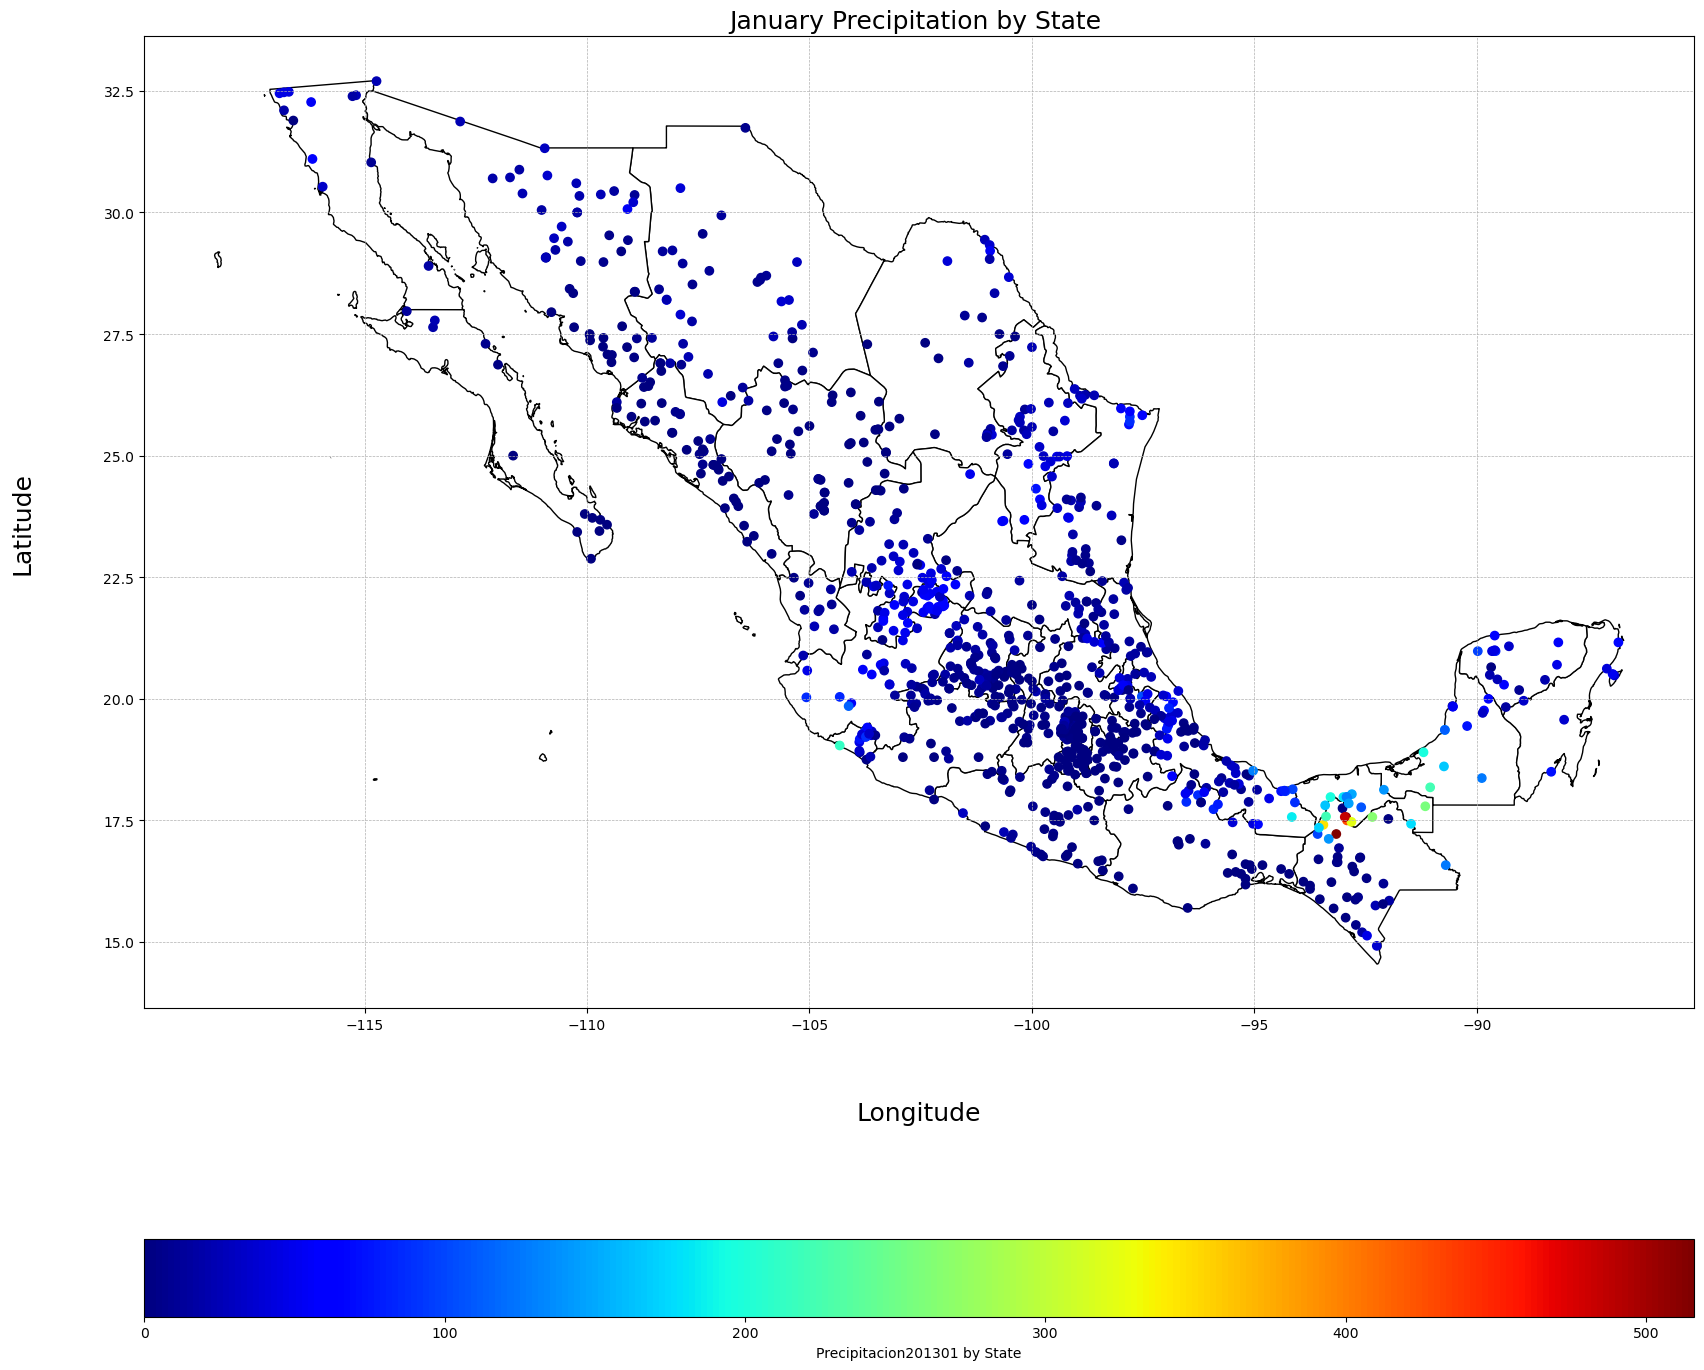

In [27]:
f, ax = plt.subplots(figsize=(20,20))
geo_df.plot(color='white', edgecolor='black', ax=ax)
intersect.plot(column='ENE', cmap=plt.cm.get_cmap('jet'), vmin=0, vmax=516, legend=True, 
               legend_kwds={'label': "Precipitacion201301 by State", 'orientation': "horizontal"}, ax=ax)
plt.grid(linestyle='--', linewidth=0.5)
plt.xlabel('Longitude', labelpad=50, fontsize=18)
plt.ylabel('Latitude', labelpad=50, fontsize=18)
plt.title("January Precipitation by State ", fontsize=18)
plt.savefig("Precipitacion2013Enero")


# Ploteo por medio de BaseMap

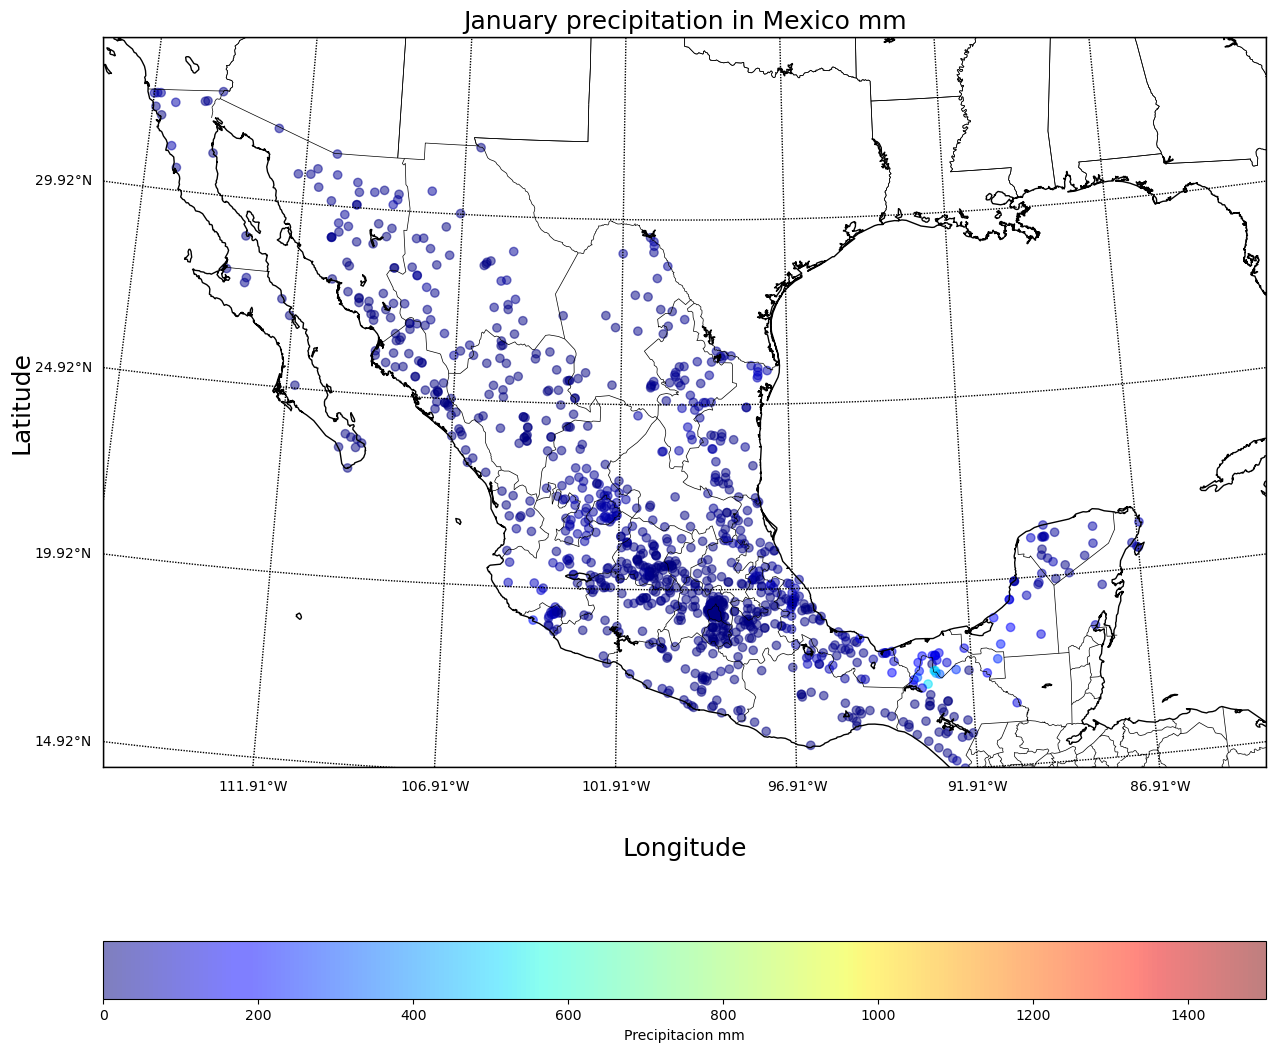

In [28]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

f, ax = plt.subplots(figsize=(15,15))

m = Basemap(projection='lcc', resolution= 'i', width=3.5E6, height=2.2E6, lat_0=25, lon_0=-100)

# Extrae las coordenadas de longitud y latitud de tus datos
lon = intersect['LON']
lat = intersect['LAT']

# Extrae los valores de precipitación de tus datos
precipitacion = intersect['ENE']

m.scatter(lon, lat, c=precipitacion,
             latlon=True, cmap='jet', alpha=0.5)


# 3. create colorbar and legend
plt.colorbar(label=r'Precipitacion mm',location="bottom")
plt.clim(0, 1500)

# Establece los límites del mapa
m.drawmapboundary()
m.drawcoastlines()
m.drawcountries()
m.drawstates()

# Dibuja las líneas de latitud y longitud
m.drawmeridians(np.arange(min(lon), max(lon), 5), labels=[0, 0, 0, 1], fontsize=10)
m.drawparallels(np.arange(min(lat), max(lat), 5), labels=[1, 0, 0, 0], fontsize=10)

plt.title('January precipitation in Mexico mm', fontsize=18)
# Agrega etiquetas a los ejes
# Agrega etiquetas a los ejes
plt.xlabel('Longitude', labelpad=50, fontsize=18)
plt.ylabel('Latitude', labelpad=50, fontsize=18)
plt.show()


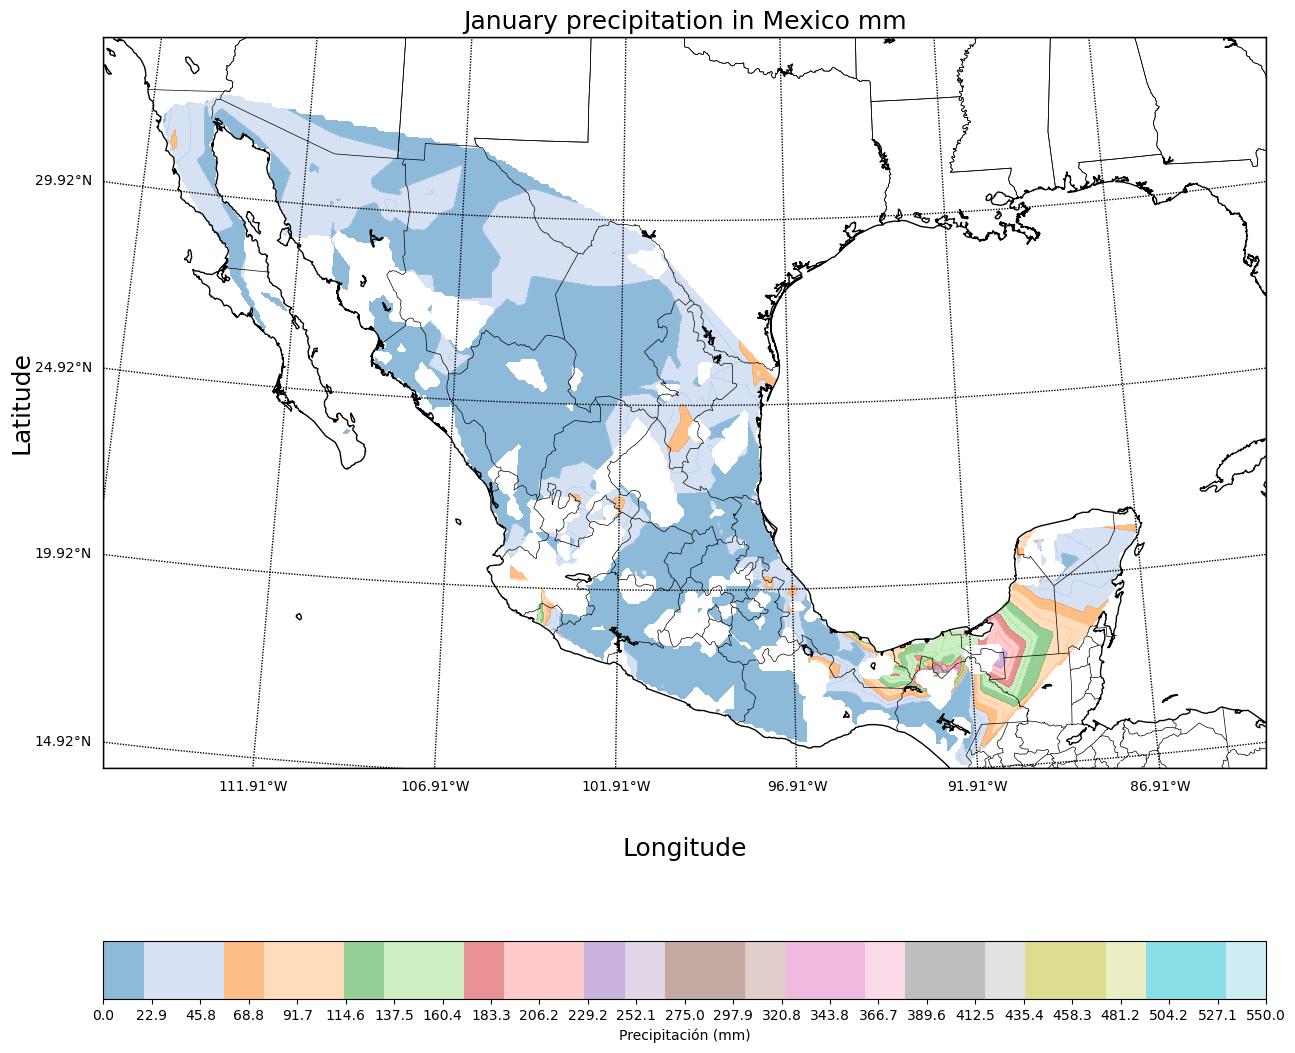

In [29]:
f, ax = plt.subplots(figsize=(15,15))

m = Basemap(projection='lcc', resolution= 'i', width=3.5E6, height=2.2E6, lat_0=25, lon_0=-100)

# Extrae las coordenadas de longitud y latitud de tus datos
lon = intersect['LON']
lat = intersect['LAT']
# Extrae los valores de precipitación de tus datos
precipitacion = intersect['ENE']

# Crea una grilla de dos dimensiones
dx, dy = 0.1, 0.1
y, x = np.mgrid[slice(min(lat), max(lat), dy), slice(min(lon), max(lon), dx)]
# Interpola los valores de precipitacion en la grilla
z = griddata((lon, lat), precipitacion, (x, y), method='linear')

# Crea el mapa
#m = Basemap(projection='merc', llcrnrlat=min(lat), urcrnrlat=max(lat), llcrnrlon=min(lon), urcrnrlon=max(lon), resolution='l')

# Convierte las coordenadas a la proyección del mapa
xx, yy = m(x, y)

# Elimina los valores de precipitación que se encuentran fuera de la costa de México
from mpl_toolkits.basemap import maskoceans
z = maskoceans(x, y, z, inlands=True)

# Crea el contorno
levels = np.sort(np.linspace(0, 550, 30))
cs = m.contourf(xx, yy, z, cmap=plt.cm.tab20, alpha=0.5, levels=levels)


# 3. create colorbar and legend
cbar = plt.colorbar(cs, ticks=np.linspace(0, 550, 25), label=r'Precipitación (mm)',location="bottom")
plt.clim(0, 550)

# Establece los límites del mapa
m.drawmapboundary()
m.drawcoastlines()
m.drawcountries()
m.drawstates()

# Dibuja las líneas de latitud y longitud
m.drawmeridians(np.arange(min(lon), max(lon), 5), labels=[0, 0, 0, 1], fontsize=10)
m.drawparallels(np.arange(min(lat), max(lat), 5), labels=[1, 0, 0, 0], fontsize=10)

plt.title('January precipitation in Mexico mm', fontsize=18)
# Agrega etiquetas a los ejes
# Agrega etiquetas a los ejes
plt.xlabel('Longitude', labelpad=50, fontsize=18)
plt.ylabel('Latitude', labelpad=50, fontsize=18)
plt.show()

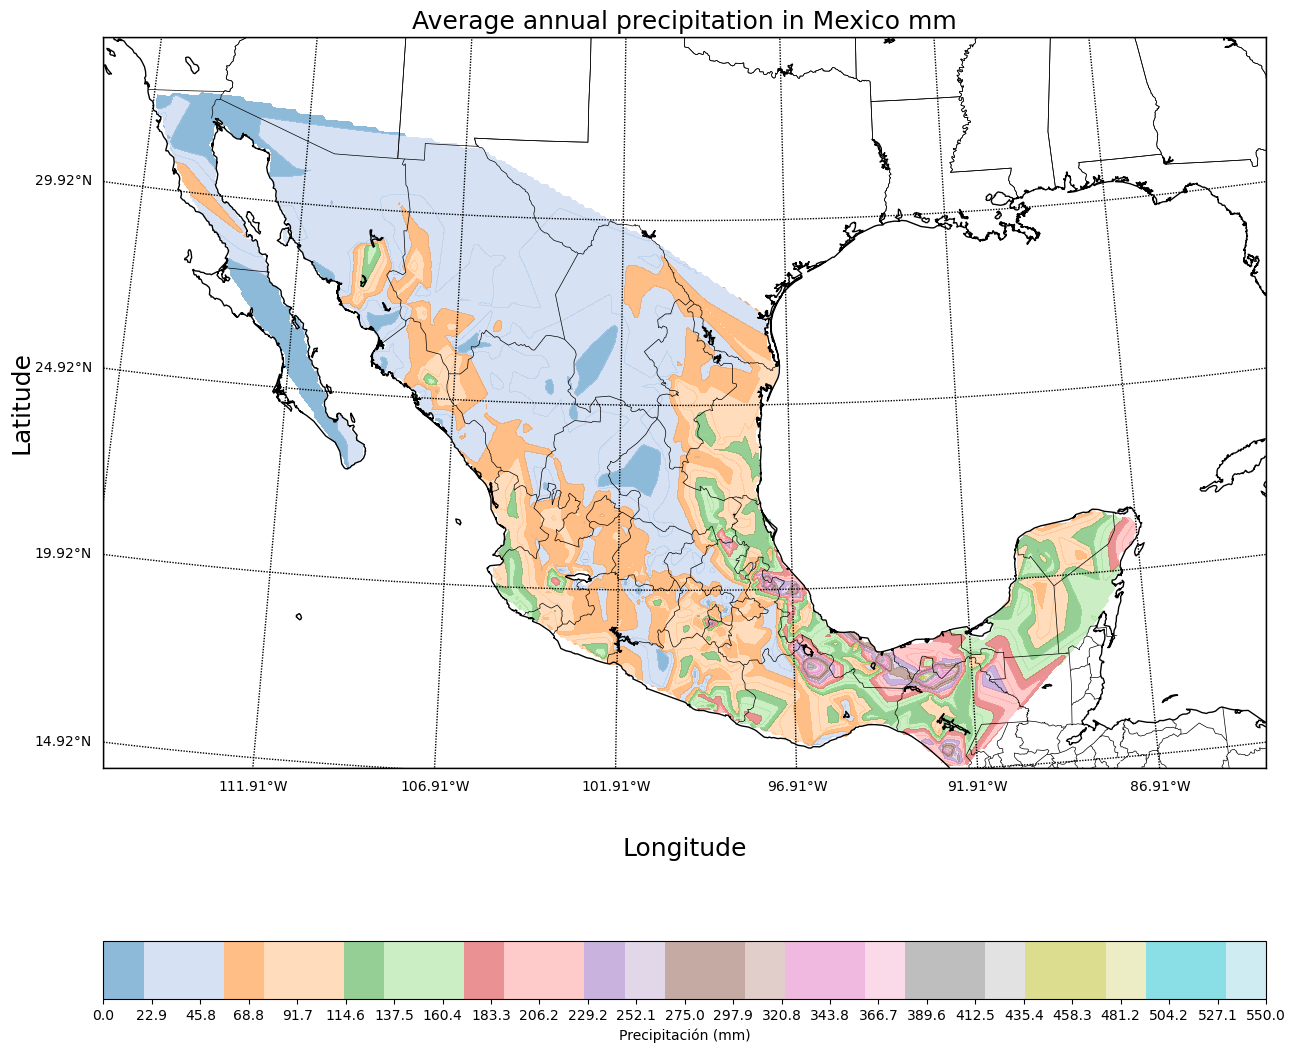

In [30]:
f, ax = plt.subplots(figsize=(15,15))

m = Basemap(projection='lcc', resolution= 'i', width=3.5E6, height=2.2E6, lat_0=25, lon_0=-100)

# Extrae las coordenadas de longitud y latitud de tus datos
lon = intersect['LON']
lat = intersect['LAT']
# Extrae los valores de precipitación de tus datos
precipitacion = intersect['PMean']

# Crea una grilla de dos dimensiones
dx, dy = 0.1, 0.1
y, x = np.mgrid[slice(min(lat), max(lat), dy), slice(min(lon), max(lon), dx)]
# Interpola los valores de precipitacion en la grilla
z = griddata((lon, lat), precipitacion, (x, y), method='linear')

# Crea el mapa
#m = Basemap(projection='merc', llcrnrlat=min(lat), urcrnrlat=max(lat), llcrnrlon=min(lon), urcrnrlon=max(lon), resolution='l')

# Convierte las coordenadas a la proyección del mapa
xx, yy = m(x, y)

# Elimina los valores de precipitación que se encuentran fuera de la costa de México
from mpl_toolkits.basemap import maskoceans
z = maskoceans(x, y, z, inlands=True)

# Crea el contorno
levels = np.sort(np.linspace(0, 550, 30))
cs = m.contourf(xx, yy, z, cmap=plt.cm.tab20, alpha=0.5, levels=levels)


# 3. create colorbar and legend
cbar = plt.colorbar(cs, ticks=np.linspace(0, 550, 25), label=r'Precipitación (mm)',location="bottom")
plt.clim(0, 550)

# Establece los límites del mapa
m.drawmapboundary()
m.drawcoastlines()
m.drawcountries()
m.drawstates()

# Dibuja las líneas de latitud y longitud
m.drawmeridians(np.arange(min(lon), max(lon), 5), labels=[0, 0, 0, 1], fontsize=10)
m.drawparallels(np.arange(min(lat), max(lat), 5), labels=[1, 0, 0, 0], fontsize=10)

plt.title('Average annual precipitation in Mexico mm', fontsize=18)
# Agrega etiquetas a los ejes
# Agrega etiquetas a los ejes
plt.xlabel('Longitude', labelpad=50, fontsize=18)
plt.ylabel('Latitude', labelpad=50, fontsize=18)
plt.show()